In [8]:
from __future__ import print_function
import cobra
import cobra.test
from os.path import join
cobra.DictList

#iRhto1108N_model with biomass as objective
iRhto1108N_model = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2 = cobra.io.read_sbml_model(join(r"C:\Users\helen\Desktop\spring2020\Rao lab\first paper\iRhto_memote-master", "iRhto.xml"))
iRhto1108N_model2.objective = "PDAGATpc_rm"

In [52]:
import numpy as np
import sympy as sp
import pandas as pd
#import media information
#column 0 is name of exchange reaction, column 1 is upperbound in mM/h/gwd
YNBWAAAS = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'rest of ynbwaaas 103', header = None)
YNBWAAAS = YNBWAAAS.to_numpy()
media_without_ynb = pd.read_excel("C:/Users/helen/Desktop/spring2020/Rao lab/media_YPD.xlsx", 'media without ynb', header = None)
media_without_ynb = media_without_ynb.to_numpy()


In [56]:
#Add two more CN rates
#Total CN rates tested: 6, 117, 175, 524, 1543 
add_new = np.empty((5, 6), dtype = "object")
for i in range(len(media_without_ynb)):
    for j in range(len(media_without_ynb[0])):
        add_new[i][j] = media_without_ynb[i][j]
        
for k in range(len(media_without_ynb)):
    for l in range(len(media_without_ynb[0]), len(media_without_ynb[0]) + 2):
        if k == 1:
            add_new[k][l] = np.round(add_new[k][l - 1] / 5, 3)
        else:
            add_new[k][l] = add_new[k][l - 1]

#control cl concentration:
add_new[2] = ['EX_cl_e', 4.99, 4.99, 4.99, 4.99, 4.99]

print(YNBWAAAS)
print(add_new)

#initialize imported medium
original_medium = iRhto1108N_model2.medium
#empty all values first
for k in original_medium:
    original_medium[k] = 0
for i in range(len(YNBWAAAS)):
        original_medium[YNBWAAAS[i][0]] = YNBWAAAS[i][1]
for j in range(len(media_without_ynb)):
        original_medium[add_new[j][0]] = add_new[j][1]

[['EX_so4_e' 0.217]
 ['EX_mg2_e' 0.868]
 ['EX_ca2_e' 0.104]
 ['EX_pi_e' 0.439]]
[['EX_glc__D_e' 4.63 4.63 4.63 4.63 4.63]
 ['EX_nh4_e' 4.75 0.238 0.159 0.032 0.006]
 ['EX_cl_e' 4.99 4.99 4.99 4.99 4.99]
 ['EX_na1_e' 2.26 2.26 2.26 2.26 2.26]
 ['EX_k_e' 6.27 6.27 6.27 6.27 6.27]]


In [57]:
TAG = []
medium_varCN = []

with iRhto1108N_model2:
    medium = original_medium.copy()
    for i in range(len(add_new[0])):
        if i == 0:
            continue
        else:
            for j in range(1, 3):
                medium[add_new[j][0]] = add_new[j][i]
            medium_varCN.append(medium.copy())
            iRhto1108N_model2.medium = medium.copy()
            TAG.append(iRhto1108N_model2.slim_optimize())


Text(0, 0.5, 'TAG yield mmol')

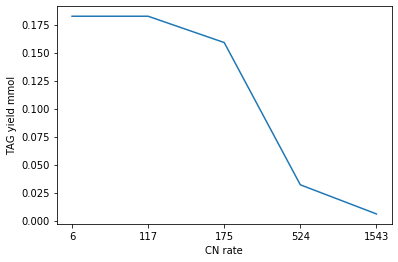

In [58]:
import matplotlib
import matplotlib.pyplot as plt

ace_x = ["6", "117", "175", "524", "1543"]

plt.plot(ace_x, TAG)
plt.xlabel("CN rate")
plt.ylabel("TAG yield mmol")


In [59]:
TAG_control = np.empty((5, 100), dtype = "object")

with iRhto1108N_model2:
    for i in range(len(medium_varCN)):
        medium = medium_varCN[i].copy()
        for j in range(100):
            medium["EX_glc__D_e"] = j*4.63/100
            iRhto1108N_model2.medium = medium.copy()
            TAG_control[i][j] = iRhto1108N_model2.slim_optimize()

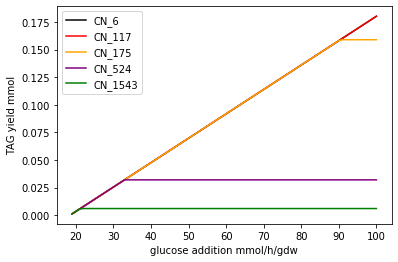

In [60]:
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, TAG_control[0], color = "black", label = "CN_6")
plt.plot(ace_x, TAG_control[1], color = "red", label = "CN_117")
plt.plot(ace_x, TAG_control[2], color = "orange", label = "CN_175")
plt.plot(ace_x, TAG_control[3], color = "purple", label = "CN_524")
plt.plot(ace_x, TAG_control[4], color = "green", label = "CN_1543")

plt.xlabel("glucose addition mmol/h/gdw")
plt.ylabel("TAG yield mmol")
plt.legend()

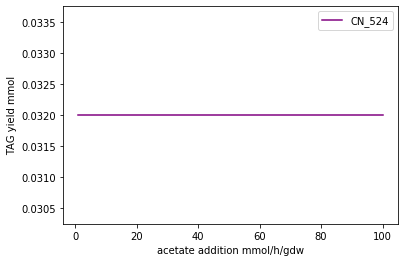

In [61]:
TAG_CN524 = []
with iRhto1108N_model2:
    medium = medium_varCN[3].copy()
    for k in range(100):
        medium["EX_ac_e"] = k*100
        iRhto1108N_model2.medium = medium
        TAG_CN524.append(iRhto1108N_model2.slim_optimize())
        
ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, TAG_CN524, color = "purple", label = "CN_524")

plt.xlabel("acetate addition mmol/h/gdw")
plt.ylabel("TAG yield mmol")
plt.legend()

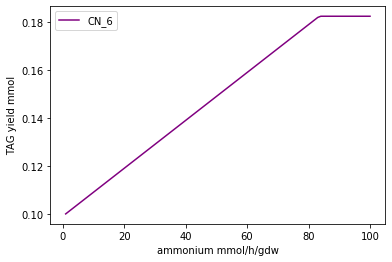

In [95]:
test = []
with iRhto1108N_model2:
    medium = medium_varCN[0].copy()
    for k in np.arange(0.1, 0.2, 0.001):
        medium["EX_nh4_e"] = k
        iRhto1108N_model2.medium = medium
        test.append(iRhto1108N_model2.slim_optimize())

ace_x = np.linspace(1, 100, 100)

plt.plot(ace_x, test, color = "purple", label = "CN_6")

plt.xlabel("ammonium mmol/h/gdw")
plt.ylabel("TAG yield mmol")
plt.legend()